# Topic Modelling (using scikit-learn)

In [37]:
docs = [
    # American food documents
    "Cheeseburgers are juicy, grilled beef patties with melted cheese, served in soft buns.",
    "Apple pie, sweet and warm, with cinnamon-spiced apples baked in a flaky crust.",
    "Buffalo wings are crispy fried chicken wings, tossed in spicy buffalo sauce.",

    # Japanese food documents
    "Sushi consists of vinegared rice topped with fresh fish or wrapped in seaweed.",
    "Ramen is savory noodle soup served in rich broth, topped with pork and scallions.",
    "Tempura is crispy deep-fried seafood or vegetables, coated in a light batter.",

    # Documents that talk about each category
    "Classic American favorites include cheeseburgers, apple pie, and buffalo wings.",
    "Popular Japanese dishes include sushi, ramen, and tempura.",
    "Cheeseburgers, apple pie, and buffalo wings represent beloved American comfort foods.",
    "Sushi, ramen, and tempura exemplify traditional Japanese culinary delights."
]

df = pd.DataFrame(docs,columns=['docs'])

In [38]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/fmmb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/fmmb/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fmmb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

In [40]:
def clean_text(doc):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(doc)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

df['clean'] = df['docs'].apply(clean_text)
df

,docs,clean
0,"Cheeseburgers are juicy, grilled beef patties ...",Cheeseburgers juicy grilled beef patty melted ...
1,"Apple pie, sweet and warm, with cinnamon-spice...",Apple sweet warm cinnamon-spiced apple baked f...
2,"Buffalo wings are crispy fried chicken wings, ...",Buffalo wing crispy fried chicken wing tossed ...
3,Sushi consists of vinegared rice topped with f...,Sushi consists vinegared rice topped fresh fis...
4,Ramen is savory noodle soup served in rich bro...,Ramen savory noodle soup served rich broth top...
5,Tempura is crispy deep-fried seafood or vegeta...,Tempura crispy deep-fried seafood vegetable co...
6,Classic American favorites include cheeseburge...,Classic American favorite include cheeseburger...
7,"Popular Japanese dishes include sushi, ramen, ...",Popular Japanese dish include sushi ramen tempura
8,"Cheeseburgers, apple pie, and buffalo wings re...",Cheeseburgers apple buffalo wing represent bel...
9,"Sushi, ramen, and tempura exemplify traditiona...",Sushi ramen tempura exemplify traditional Japa...


In [41]:
vect = TfidfVectorizer(max_features=1000)
vect_text = vect.fit_transform(df['clean'])
print(vect_text.shape)
print(vect_text)

(10, 66)
  (0, 8)	0.32538076593964255
  (0, 51)	0.32538076593964255
  (0, 50)	0.27660337782848204
  (0, 9)	0.32538076593964255
  (0, 36)	0.32538076593964255
  (0, 38)	0.32538076593964255
  (0, 4)	0.32538076593964255
  (0, 31)	0.32538076593964255
  (0, 34)	0.32538076593964255
  (0, 11)	0.27660337782848204
  (1, 19)	0.32946587877295797
  (1, 27)	0.32946587877295797
  (1, 2)	0.32946587877295797
  (1, 53)	0.32946587877295797
  (1, 13)	0.32946587877295797
  (1, 63)	0.32946587877295797
  (1, 56)	0.32946587877295797
  (1, 1)	0.4900669781474138
  (2, 45)	0.31829739524312206
  (2, 54)	0.31829739524312206
  (2, 59)	0.31829739524312206
  (2, 12)	0.31829739524312206
  (2, 30)	0.270581865599845
  (2, 18)	0.270581865599845
  (2, 64)	0.4734543170902498
  :	:
  (6, 1)	0.3010110479787356
  (7, 23)	0.44260305546922
  (7, 33)	0.376253033354476
  (7, 39)	0.44260305546922
  (7, 32)	0.376253033354476
  (7, 57)	0.3291769434826464
  (7, 41)	0.3291769434826464
  (7, 55)	0.3291769434826464
  (8, 28)	0.375168859

Latent Semantic Analysis (LSA)

In [42]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [49]:
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:7]
    trep = ", ".join([f"{t[0]}*{t[1]:.2}" for t in sorted_words])
    print(f"Topic {i}: {trep}")

Topic 0: buffalo*0.41, wing*0.41, apple*0.33, american*0.28, include*0.22, cheeseburger*0.18, classic*0.18
Topic 1: sushi*0.36, ramen*0.36, japanese*0.36, tempura*0.34, dish*0.22, popular*0.22, culinary*0.2


Latent Dirichlet Allocation (LDA)

In [46]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=2,learning_method='online',random_state=42,max_iter=1)
lda_top=lda_model.fit_transform(vect_text)

In [50]:
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:7]
    trep = ", ".join([f"{t[0]}*{t[1]:.2}" for t in sorted_words])
    print(f"Topic {i}: {trep}")

Topic 0: ramen*1.1, sushi*1.1, buffalo*1.1, beef*1.1, sauce*1.1, chicken*1.1, wing*1.1
Topic 1: warm*1.3, batter*1.2, fried*1.1, ramen*1.1, coated*1.1, bun*1.1, wing*1.1


In [51]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()


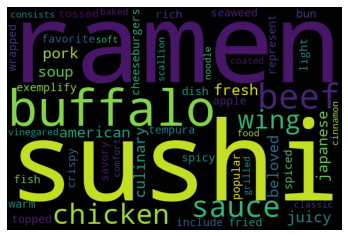

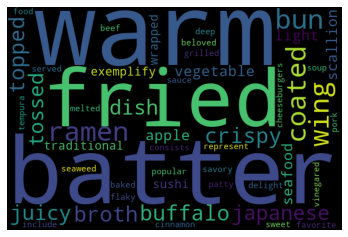

In [52]:
for i in range(2):
  draw_word_cloud(i)